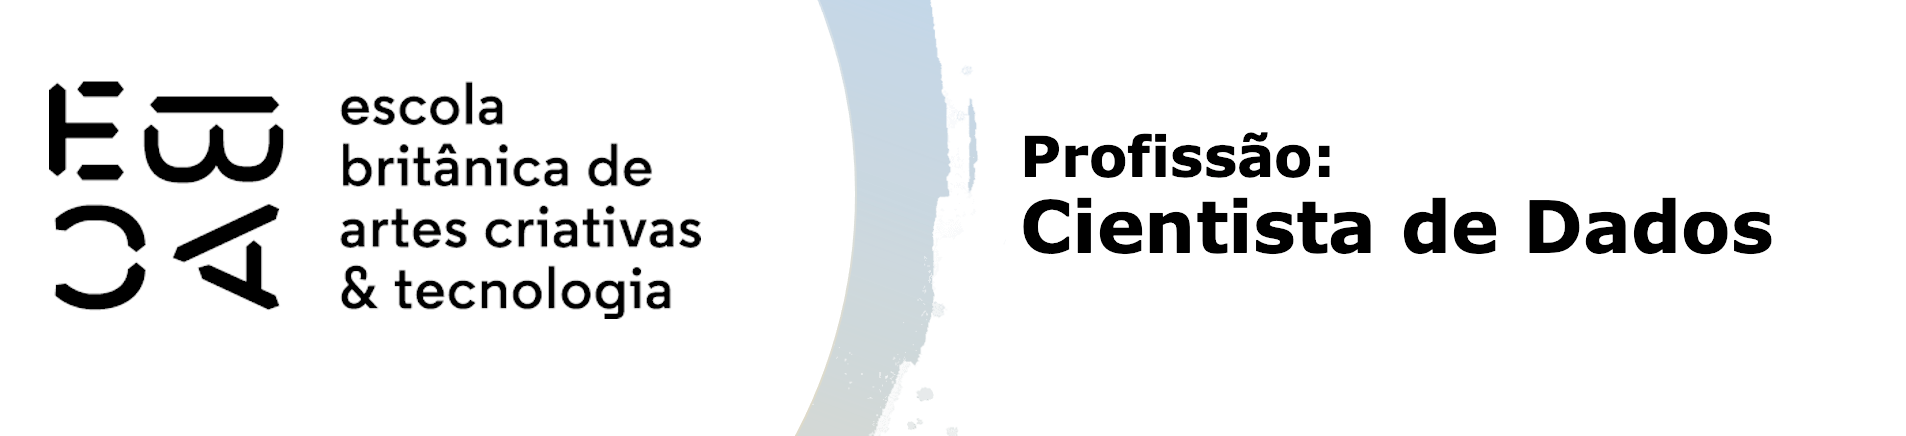

# Métodos hierárquicos de agrupamento - Tarefa

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [19]:
# carregando a base
peng = sns.load_dataset('penguins')
peng.index.name = 'id'

# selecionando variáveis quantitativas
peng_num = peng.select_dtypes(include='number').dropna()

# padronizando as variáveis
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

# agrupamento hierárquico em 3 grupos
clus = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=None,
    n_clusters=3
)

# treinando o algoritmo
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [20]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [21]:
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


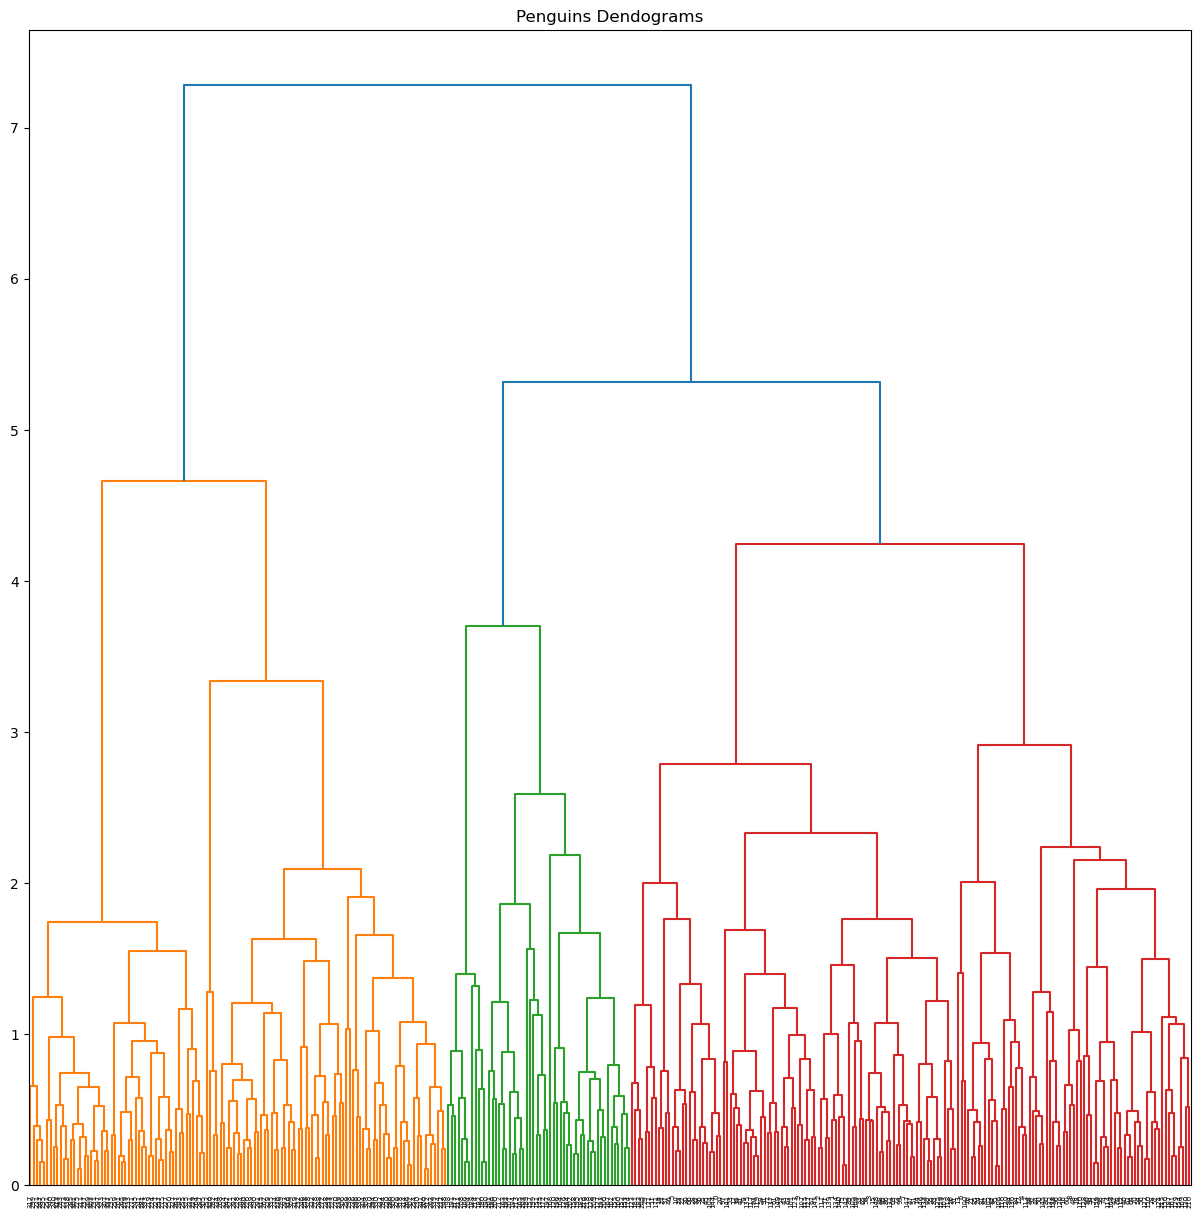

In [22]:
plt.figure(figsize=(15, 15))
plt.title('Penguins Dendograms')
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [27]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [28]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [33]:
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo_3,grupo
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,1
1,39.5,17.4,186.0,3800.0,1,1
2,40.3,18.0,195.0,3250.0,1,1
4,36.7,19.3,193.0,3450.0,1,1
5,39.3,20.6,190.0,3650.0,1,1


In [34]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3,grupo_x,grupo_y,grupo
id,,,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,1.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,1.0,1.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,1.0,1.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,1.0,1.0,1.0


CPU times: total: 11.9 s
Wall time: 10.4 s


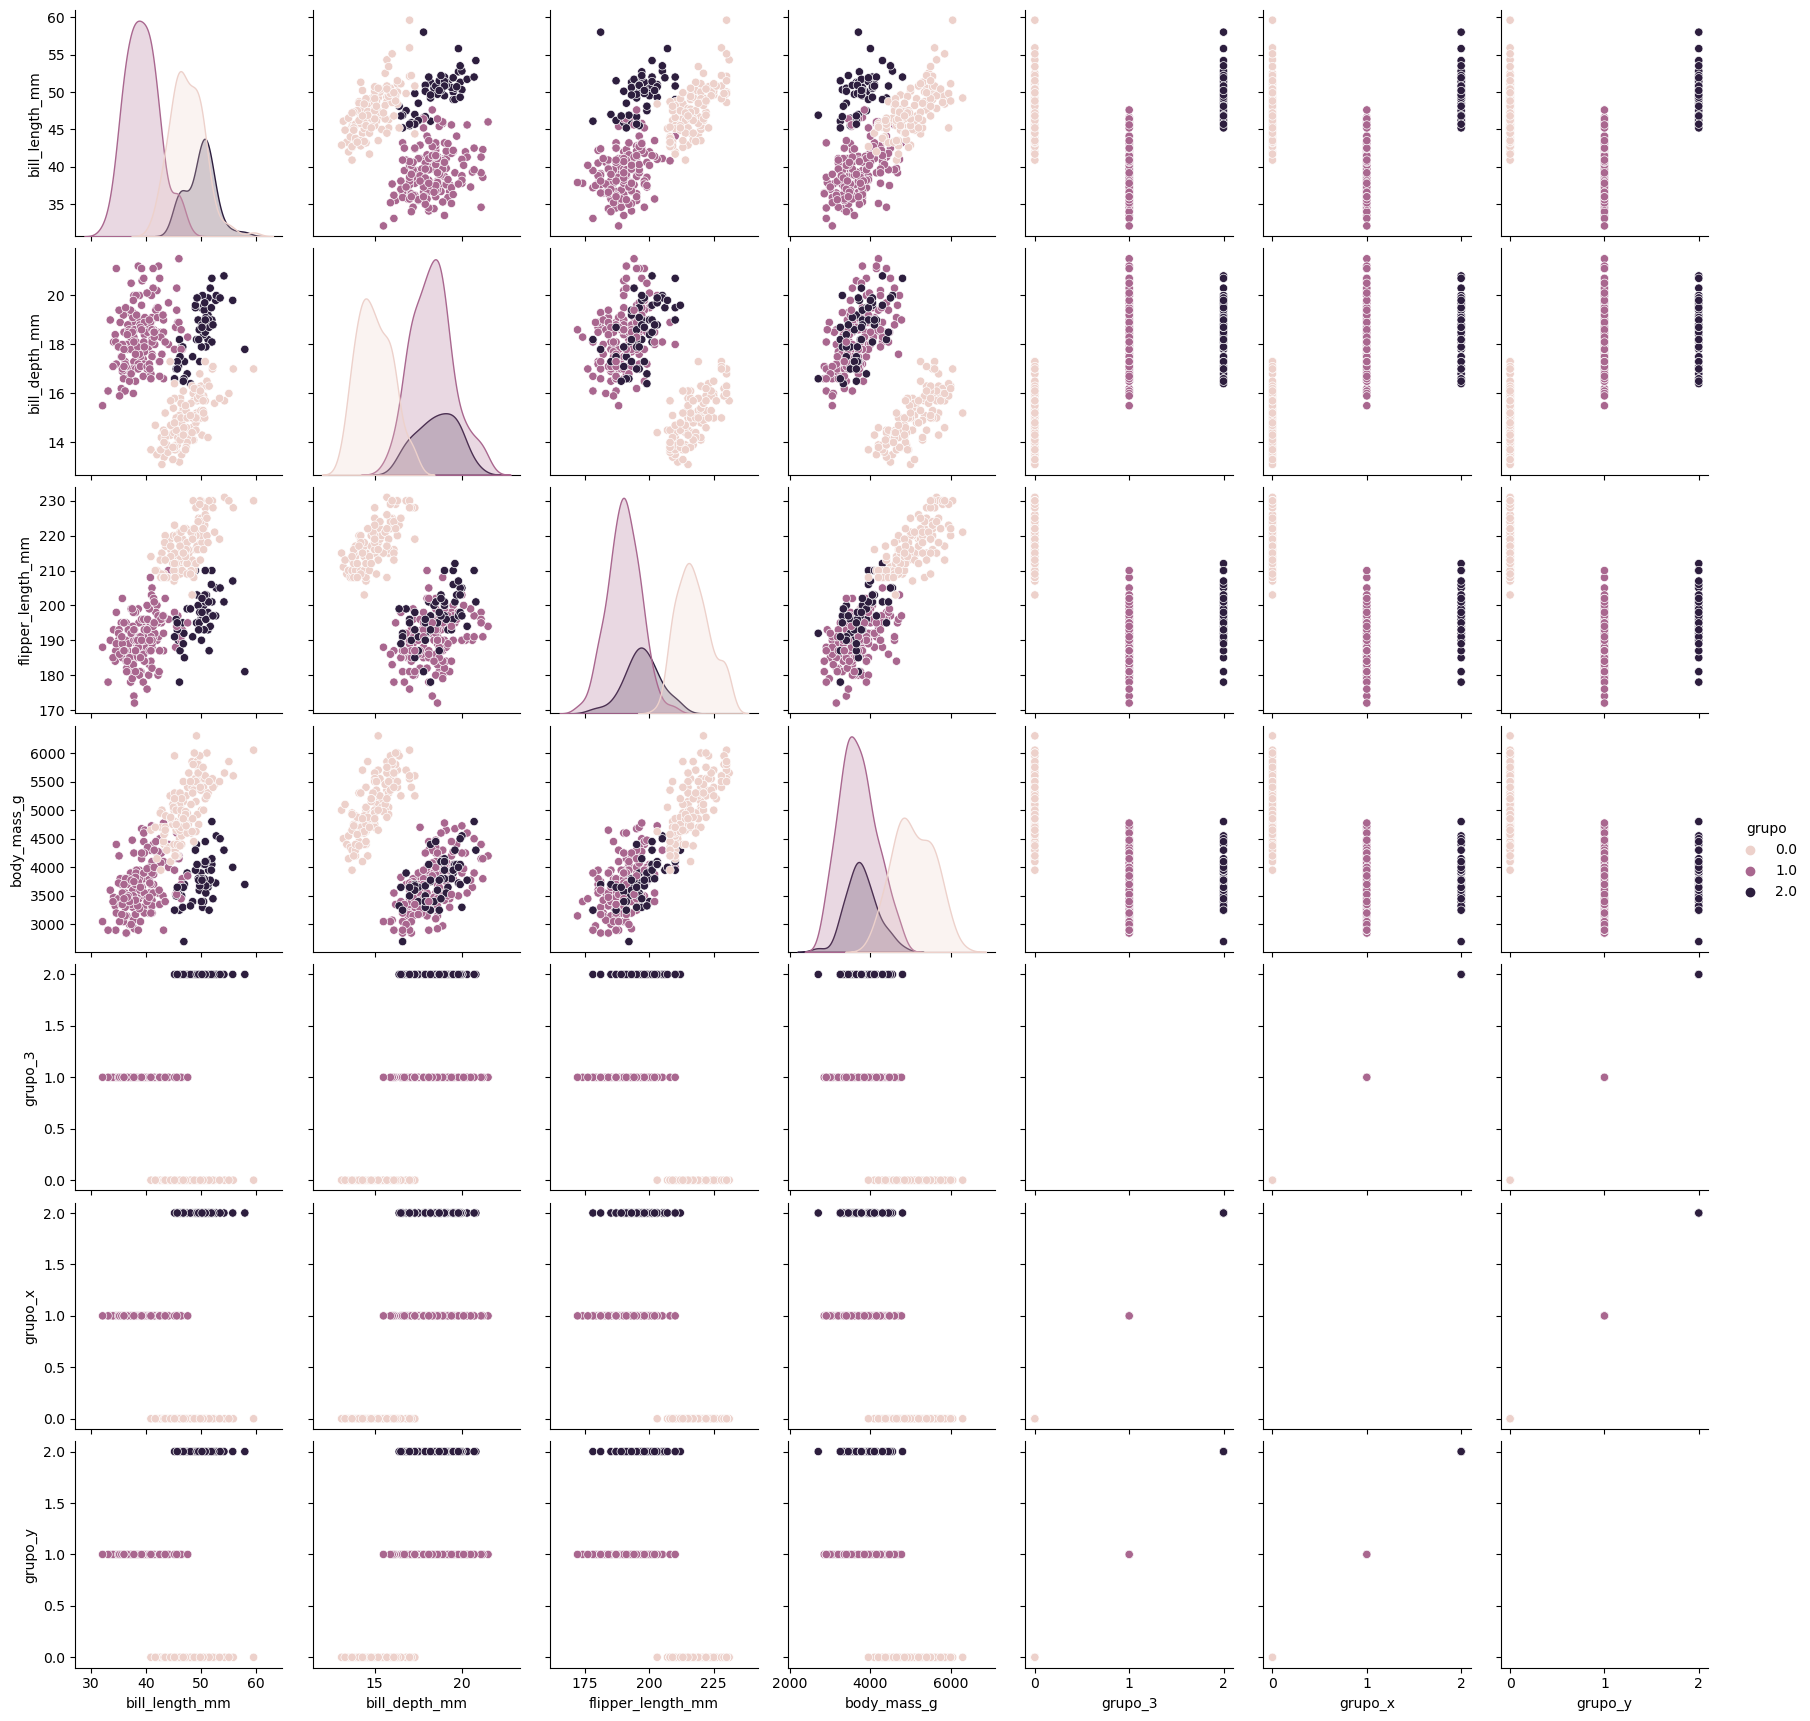

In [36]:
%%time
sns.pairplot(data=peng, hue='grupo')

In [45]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


- No grupo 0 tem predominancia de Gentoo.
- No grupo 1 tem predominancia de Adelie.
- No grupo 2 tem predominancia de Chinstrap. 
- No grupo 0 e 1 tem predominancia de Gentoo e Adelie.
- No grupo 1 e 2 tem predominancia de Adelie e Chinstrap.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [46]:
# agrupamento hierárquico em 5 grupos
clus_6 = AgglomerativeClustering(
    linkage='complete',
    distance_threshold=None,
    n_clusters=6
)

# treinando o algoritmo
clus_6.fit(peng_pad)

peng_num['grupo_6'] = clus_6.labels_
peng = peng.merge(peng_num['grupo_6'], how='left', on='id')

In [47]:
pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [48]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [49]:
pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'], normalize='index')

grupo_6                0.0       1.0       2.0       3.0       4.0       5.0
species   sex                                                               
Adelie    Female  0.000000  0.945205  0.054795  0.000000  0.000000  0.000000
          Male    0.000000  0.246575  0.753425  0.000000  0.000000  0.000000
Chinstrap Female  0.000000  0.147059  0.264706  0.000000  0.588235  0.000000
          Male    0.000000  0.000000  0.000000  0.000000  0.647059  0.352941
Gentoo    Female  0.155172  0.000000  0.000000  0.844828  0.000000  0.000000
          Male    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000

CPU times: total: 16.2 s
Wall time: 14.3 s


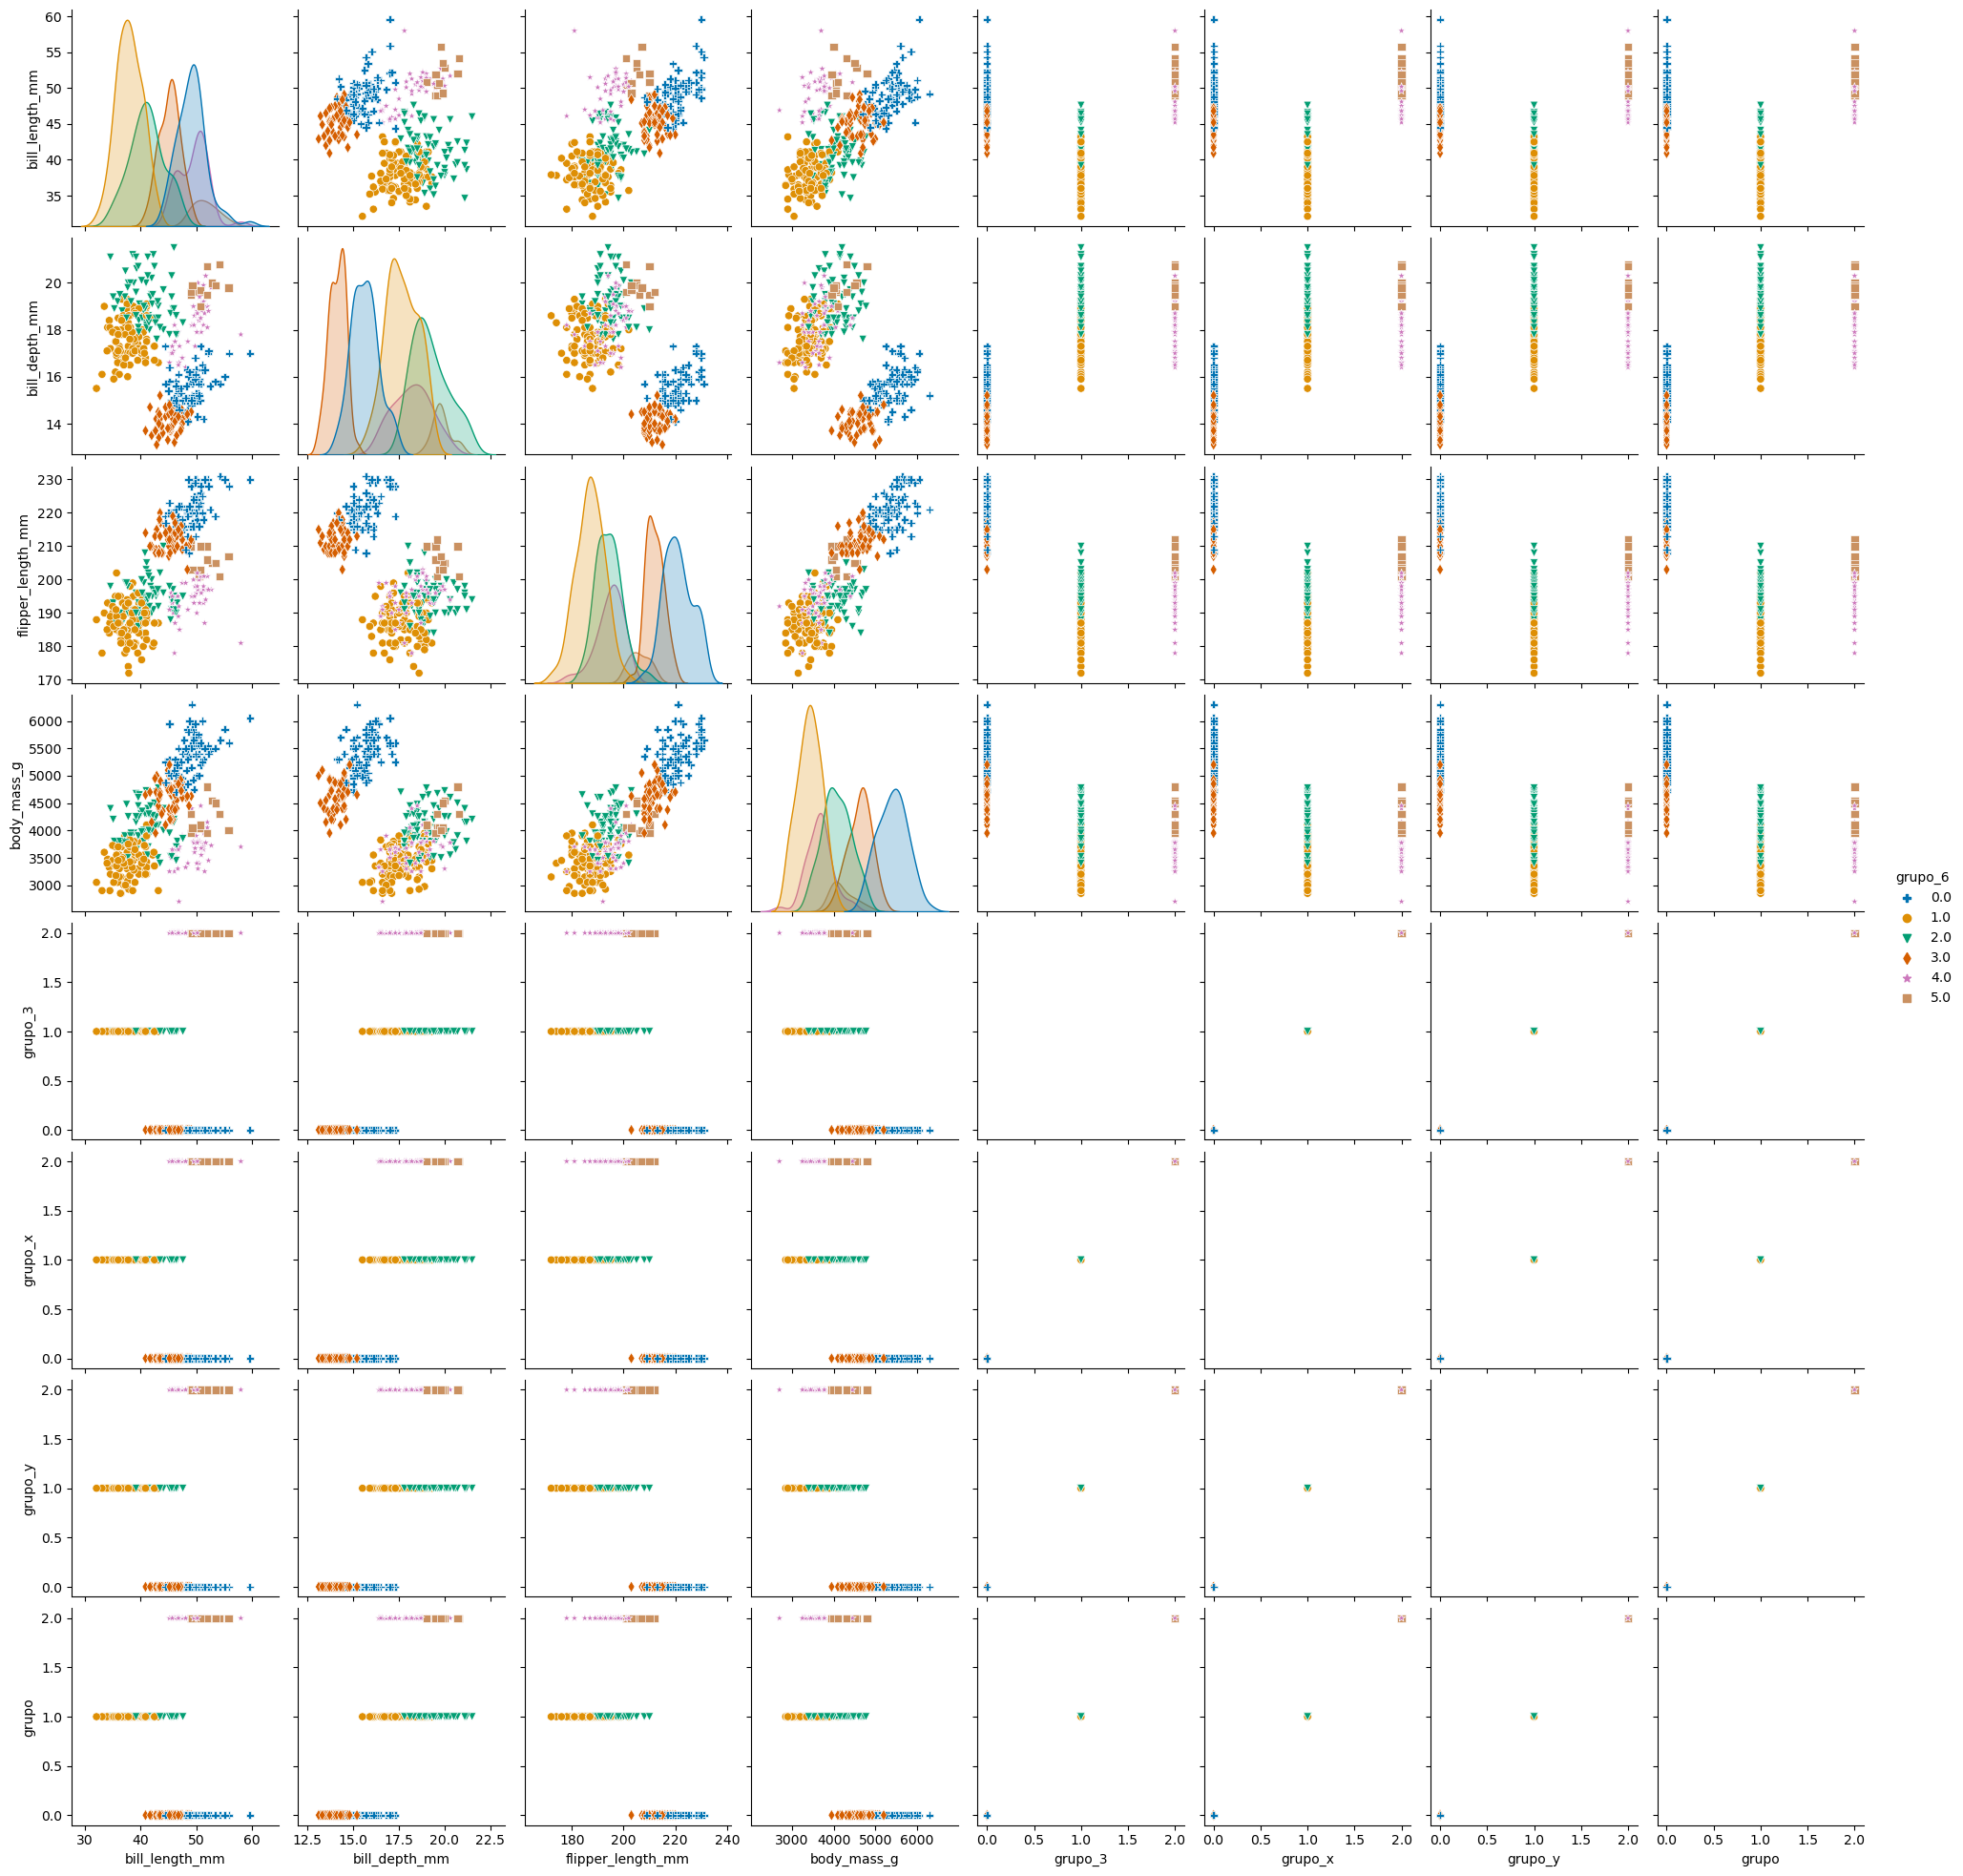

In [51]:
%%time
sns.pairplot(data=peng, hue='grupo_6', markers=['P', 'o', 'v', 'd', '*', 's'], palette='colorblind')

- No grupo 0 tem 0.155172 da espécie Gentoo do sexo feminino e 1.000000 do sexo masculino.
- No grupo 1 tem 0.945205 da espécie Adelie do sexo feminino, 0.246575 do sexo masculino e 0.147059 da espécie Chinstrap do sexo feminino.
- No grupo 2 tem 0.054795 da espécie Adelie do sexo feminino, 0.753425 do sexo masculino e 0.264706 da espécie Chinstrap do sexo feminino.
- No grupo 3 tem 0.844828 da espécie Gentoo do sexo feminino.
- No grupo 4 tem 0.588235 da espécie Chinstrap do sexo feminino e 0.647059 do sexo masculino.
- No grupo 5 tem 0.352941 do sexo masculino.